In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import analysis_utils as utils

In [3]:
kb = utils.kb
SI2ev = utils.SI2ev
ev2SI = 1 / (utils.SI2ev)
A = 4 * np.pi * (83.5e-9)**2

In [4]:
from scipy.special import erf

In [5]:
T = 293

def fmb(mg, v, T):
    return (4 * np.pi * v**2) * (mg / (2*np.pi*kb*T))**(3/2) * np.exp(-1 * (mg*v**2 / (2*kb*T)))

def xi(x):
    return np.sqrt(np.pi) * x * (1 - 2/(x**2)) * erf(x/2) * np.exp(-x**2 / 8) + 2 * np.exp(-3 * x**2 / 8)

def dgamma_dp(pp_kev, A, mg_amu, p_mbar, alpha, T=293):
    pp = pp_kev * 1000 * ev2SI
    mg = mg_amu * 1.660538921e-27
    p_pascal = p_mbar * 100
    ng = p_pascal / (kb * T)
    
    vbar = np.sqrt(kb * T / mg)
    
    rate = (ng * A * pp / (4 * mg**2)) * fmb(mg, pp/(2*mg), T) * (1 - alpha + alpha * xi(pp/(mg*vbar)))
    rate_hz_kev = rate * 1000 * ev2SI  # Hz/keV
    return rate_hz_kev
    

In [6]:

def zeta(dp, mg, vl, vh):
    a = dp / mg
    b = vl
    c = vh

    prefactor_0 = (1 / (2 * (b**2 + c**2)**(3/2))) * b * c**2 * np.exp(-a**2 / (2 * c**2))
    prefactor_1 = np.sqrt(2 * np.pi) * a * c * np.exp(a**2 * b**2 / (2 * c**2 * (b**2 + c**2)))
    prefactor_2 = 2 * b * np.sqrt(b**2 + c**2)

    erf_0 = erf(a * b / (np.sqrt(2) * c * np.sqrt(b**2 + c**2)))
    erf_1 = erf(a * c / (np.sqrt(2) * b * np.sqrt(b**2 + c**2)))

    third_term = np.exp( (1 / (2 * a**2)) * (1/(c**2) - 1/(b**2)) ) - 1

    return prefactor_0 * (prefactor_1 * (erf_0 + erf_1) + prefactor_2 * (third_term))
    
def dgamma_dp_diffuse(pp_kev, A, mg_amu, p_mbar, tl=293, th=2000):
    pp = pp_kev * 1000 * ev2SI      # N s
    mg = mg_amu * 1.660538921e-27   # kg
    p_pascal = p_mbar * 100
    ng = p_pascal / (kb * tl)

    vl = np.sqrt(kb * tl / mg)
    vh = np.sqrt(kb * th / mg)

    rate = ng * A * (1 / np.sqrt(2*np.pi)) * (1 / (vl*vh**2)) * zeta(pp, mg, vl, vh)
    rate_hz_kev = rate / (SI2ev / 1000)
    
    return rate_hz_kev

In [51]:
pp_kev = np.linspace(1, 10000, 10000)

dg_dp_diffuse = dgamma_dp_diffuse(pp_kev, A, 2000, 1e-10, 293, 2000)
dg_dp_h2 = dgamma_dp(pp_kev, A, 500, 1e-10, 1)



(1e-40, 1e-26)

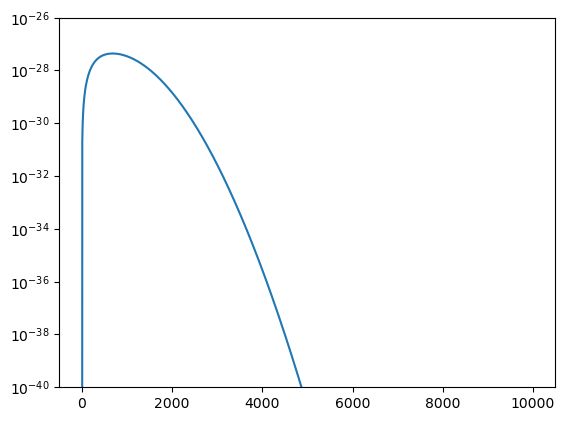

In [52]:
plt.plot(pp_kev, dg_dp_diffuse)
# plt.plot(pp_kev, dg_dp_h2)

plt.yscale('log')
# plt.xscale('log')
plt.ylim(1e-40, 1e-26)

## Xenon collision

In [4]:
pp_kev = np.linspace(1, 2500, 10000)
# pp_kev = np.logspace(0, 3.5, 1000)

dg_dp_xe = dgamma_dp(pp_kev, A, 131.3, 1e-12, 0.2)

dg_dp_h2 = dgamma_dp(pp_kev, A, 2.016, 1e-12, 0.2)
dg_dp_n2 = dgamma_dp(pp_kev, A, 28.014, 1e-12, 0.2)

dg_dp_xe = dgamma_dp(pp_kev, A, 131.3, 1e-12, 0.2)
dg_dp_kr = dgamma_dp(pp_kev, A, 83.798, 1e-12, 0.2)
dg_dp_ar = dgamma_dp(pp_kev, A, 39.948, 1e-12, 0.2)
dg_dp_ra = dgamma_dp(pp_kev, A, 222.01757, 1e-12, 0.2)

In [5]:
dpp_kev = pp_kev[1] - pp_kev[0]
pp_gauss = np.arange(-1000, 1000, dpp_kev)
gauss_smearing = utils.gauss(pp_gauss, 1, 0, 195.4)

dg_dp_h2_smeared = np.convolve(dg_dp_h2, gauss_smearing, 'same') / np.sum(gauss_smearing)
dg_dp_n2_smeared = np.convolve(dg_dp_n2, gauss_smearing, 'same') / np.sum(gauss_smearing)
dg_dp_xe_smeared = np.convolve(dg_dp_xe, gauss_smearing, 'same') / np.sum(gauss_smearing)
dg_dp_kr_smeared = np.convolve(dg_dp_kr, gauss_smearing, 'same') / np.sum(gauss_smearing)
dg_dp_ar_smeared = np.convolve(dg_dp_ar, gauss_smearing, 'same') / np.sum(gauss_smearing)
dg_dp_ra_smeared = np.convolve(dg_dp_ra, gauss_smearing, 'same') / np.sum(gauss_smearing)

In [6]:
bin_kev = (bc[1] - bc[0]) * amp2kev
norm_factor = (hh_cold.shape[0] * 5 * (40000-1200)/40000 * 4e6) * bin_kev

NameError: name 'bc' is not defined

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_69834/3444428981.py:6: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*1000, utils.gauss(xx, *gp)/norm_factor, 'r-', label=f'Gaussian fit, $\sigma$={gp[2]*1000:.1f} keV/c')


Text(0.5, 0, 'Momentum transfer (keV/c)')

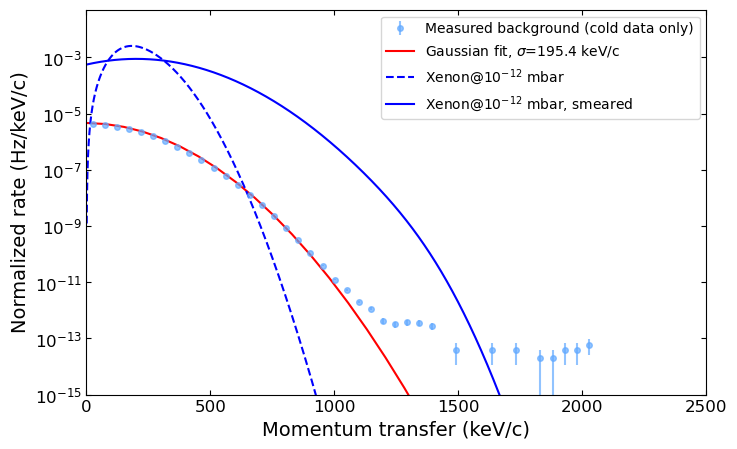

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

xx = np.linspace(0, 15, 200)

ax.errorbar(bc*amp2kev, hh_cold_sum/norm_factor, np.sqrt(hh_cold_sum)/norm_factor, fmt='o', markersize=4, color=yale_colors[2], label='Measured background (cold data only)', alpha=0.7)
ax.plot(xx*1000, utils.gauss(xx, *gp)/norm_factor, 'r-', label=f'Gaussian fit, $\sigma$={gp[2]*1000:.1f} keV/c')

ax.plot(pp_kev, dg_dp_xe, 'b--', label='Xenon@10$^{-12}$ mbar')
# ax.plot(pp_kev, dg_dp_kr, label='Krypton@10$^{-12}$ mbar')
# ax.plot(pp_kev, dg_dp_ar, label='Argon@10$^{-12}$ mbar')
# ax.plot(pp_kev, dg_dp_ra, label='Radon@10$^{-12}$ mbar')

# ax.plot(pp_kev, dg_dp_ar_smeared, '-', label='Argon@10$^{-12}$ mbar, smeared')
# ax.plot(pp_kev, dg_dp_kr_smeared, '-', label='Krypton@10$^{-12}$ mbar, smeared')
ax.plot(pp_kev, dg_dp_xe_smeared, 'b-', label='Xenon@10$^{-12}$ mbar, smeared')
# ax.plot(pp_kev, dg_dp_ra_smeared, '-', label='Radon@10$^{-12}$ mbar, smeared')


ax.legend(frameon=False)
handles, labels = ax.get_legend_handles_labels()
handles_ordered = [handles[i] for i in [3, 0, 1, 2]]
labels_ordered = [labels[i] for i in [3, 0, 1, 2]]
ax.legend(loc='upper right', handles=handles_ordered, labels=labels_ordered, frameon=True, fontsize=10)

ax.set_yscale('log')
ax.set_ylim(1e-15, 5e-2)
ax.set_xlim(0, 2500)

ax.set_ylabel('Normalized rate (Hz/keV/c)')
ax.set_xlabel('Momentum transfer (keV/c)')

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_69834/3995829278.py:6: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*1000, utils.gauss(xx, *gp)/norm_factor, 'r--', label=f'Gaussian fit, $\sigma$={gp[2]*1000:.1f} keV/c')


Text(0.5, 0, 'Momentum transfer (keV/c)')

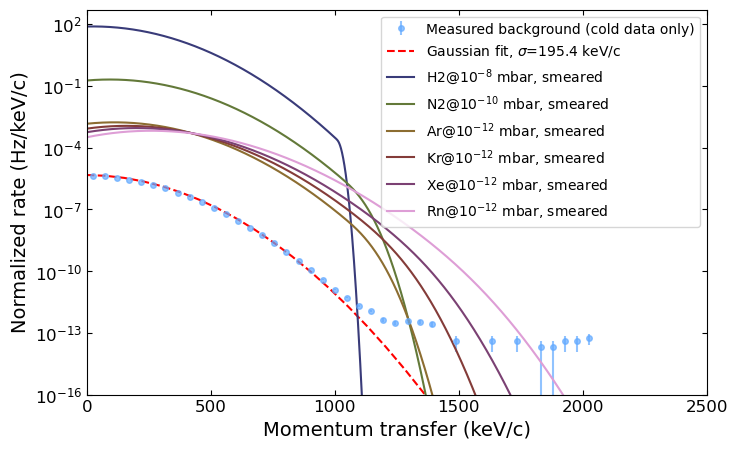

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

xx = np.linspace(0, 15, 200)

ax.errorbar(bc*amp2kev, hh_cold_sum/norm_factor, np.sqrt(hh_cold_sum)/norm_factor, fmt='o', markersize=4, color=yale_colors[2], label='Measured background (cold data only)', alpha=0.7)
ax.plot(xx*1000, utils.gauss(xx, *gp)/norm_factor, 'r--', label=f'Gaussian fit, $\sigma$={gp[2]*1000:.1f} keV/c')

# ax.plot(pp_kev, dg_dp_xe, label='Xenon@10$^{-12}$ mbar')
# ax.plot(pp_kev, dg_dp_kr, label='Krypton@10$^{-12}$ mbar')
# ax.plot(pp_kev, dg_dp_ar, label='Argon@10$^{-12}$ mbar')
# ax.plot(pp_kev, dg_dp_ra, label='Radon@10$^{-12}$ mbar')

ax.plot(pp_kev, 1e4*dg_dp_h2_smeared, '-', label='H2@10$^{-8}$ mbar, smeared')
ax.plot(pp_kev, 1e2*dg_dp_n2_smeared, '-', label='N2@10$^{-10}$ mbar, smeared')
ax.plot(pp_kev, dg_dp_ar_smeared, '-', label='Ar@10$^{-12}$ mbar, smeared')
ax.plot(pp_kev, dg_dp_kr_smeared, '-', label='Kr@10$^{-12}$ mbar, smeared')
ax.plot(pp_kev, dg_dp_xe_smeared, '-', label='Xe@10$^{-12}$ mbar, smeared')
ax.plot(pp_kev, dg_dp_ra_smeared, '-', label='Rn@10$^{-12}$ mbar, smeared')


ax.legend(frameon=False)
handles, labels = ax.get_legend_handles_labels()
handles_ordered = [handles[i] for i in [7, 0, 1, 2, 3, 4, 5, 6]]
labels_ordered = [labels[i] for i in [7, 0, 1, 2, 3, 4, 5, 6]]
ax.legend(loc='upper right', handles=handles_ordered, labels=labels_ordered, frameon=True, fontsize=10)

ax.set_yscale('log')
ax.set_ylim(1e-16, 500)
ax.set_xlim(0, 2500)

ax.set_ylabel('Normalized rate (Hz/keV/c)')
ax.set_xlabel('Momentum transfer (keV/c)')

In [ ]:
resolved = pp_kev > 500
print(f'Total resolvable collision rate (threhsold = 500 keV): {np.trapz(dg_dp_xe_smeared[resolved], pp_kev[resolved]):.2e} Hz')

Total resolvable collision rate (threhsold = 500 keV): 3.63e-02 Hz


In [ ]:
def fmb_1d(m, vz, T):
    kb = 1.380649e-23

    return np.sqrt(m / (2 * np.pi * kb * T)) * np.exp(-1 * m * vz**2 / (2 * kb * T))

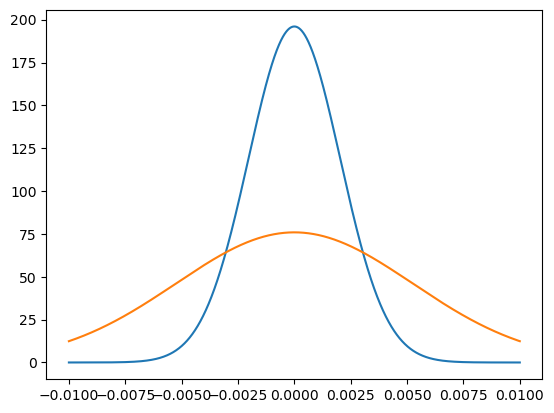

In [ ]:
amu = 1.660538921e-27 # kg
# m = 200 * amu
m = 1e-15

vv = np.linspace(-1e-2, 1e-2, 100000)

fvz_300k = fmb_1d(m, vv, 300)
fvz_2000k = fmb_1d(m, vv, 2000)

# plt.yscale('log')
plt.plot(vv, fvz_300k)
plt.plot(vv, fvz_2000k)

In [ ]:
np.sum(fvz_300k)

4.99995

In [ ]:
n_sim = 10000000

rng = np.random.default_rng(seed=42)

vin  = np.random.choice(vv, size=n_sim, p=fvz_300k/np.sum(fvz_300k))
vout = np.random.choice(vv, size=n_sim, p=fvz_300k/np.sum(fvz_2000k))

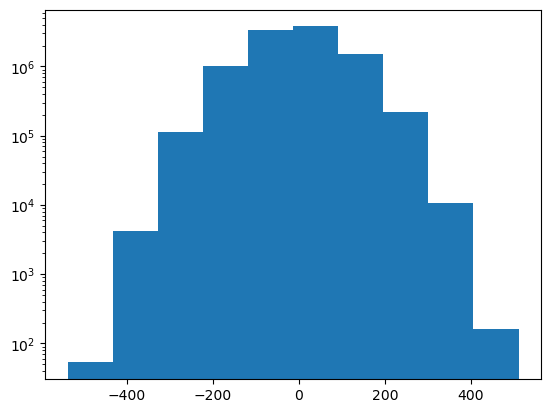

In [ ]:
plt.hist(utils.SI2ev * m * (vout - vin) / 1000)
plt.yscale('log')